In [286]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [285]:
import numpy as np
import pandas as pd

In [125]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [126]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [127]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [128]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [129]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [130]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [131]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [132]:
# Use Inspector to print the column names and types, check what we have in table 'measurement'

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [133]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table
engine.execute('SELECT * FROM measurement ORDER BY ID DESC LIMIT 1').fetchall()

[(19550, 'USC00516128', '2017-08-23', 0.45, 76.0)]

In [134]:
# Use Inspector to print the column names and types, check what we have in table 'station'

columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [135]:
# Use `engine.execute` to select and display the first 10 rows from the station table
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Climate Analysis

In [137]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Use `engine.execute` to select and display the last row date
engine.execute('SELECT * FROM measurement ORDER BY ID DESC LIMIT 1').fetchall()

[(19550, 'USC00516128', '2017-08-23', 0.45, 76.0)]

In [138]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [152]:
# Perform a query to retrieve the data and precipitation scores of last year of data
last_year_data = session.query(Measurement.date, Measurement.prcp).\
        filter(func.strftime( Measurement.date) >= query_date).all()
last_year_data[:10]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0)]

In [140]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(last_year_data, columns = ["date", "precipitation"])
prcp_df.set_index("date", inplace=True)
prcp_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [141]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_values(["date"])
prcp_df.head(2000)

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-07-09,0.00
2017-07-09,0.11
2017-07-10,0.00


In [142]:
len(prcp_df)

2230

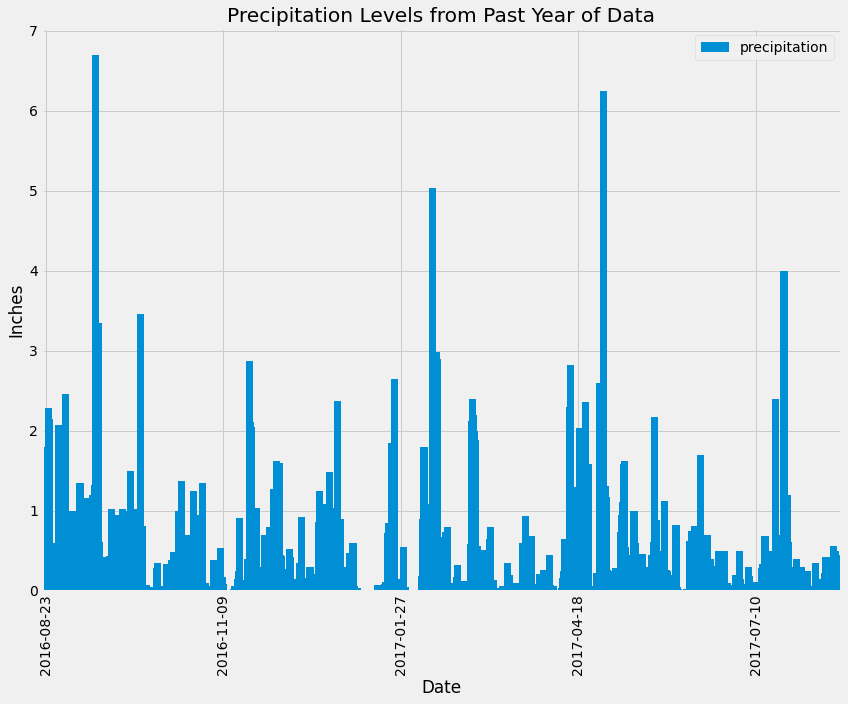

In [223]:

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot.bar(figsize = (12,10), width = 20)
plt.title("Precipitation Levels from Past Year of Data")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks([1, 500, 1000, 1500, 2000], ['2016-08-23','2016-11-09','2017-01-27','2017-04-18','2017-07-10'])
plt.xticks( rotation = 'vertical')

# Save the plot
plt.tight_layout()
plt.savefig("images/precipitation.png")
plt.show()

In [259]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = prcp_df.describe()
summary


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [153]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.station).\
        group_by(Station.station).all()
print(stations)
len(stations)

[('USC00511918',), ('USC00513117',), ('USC00514830',), ('USC00516128',), ('USC00517948',), ('USC00518838',), ('USC00519281',), ('USC00519397',), ('USC00519523',)]


9

In [166]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc())
station_count.all()
        

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [187]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = station_count.first()[0]
temp_stats= session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs).\
                    filter(Measurement.station == most_active)).all()
print(f"Most active station is {most_active}.")
print(f"It's minimum, maximum, and average temperature it recorded was {temp_stats} respectively.")



Most active station is USC00519281.
It's minimum, maximum, and average temperature it recorded was [(53.0, 87.0, 71.66378066378067)] respectively.


In [209]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
most_active_temp_year = session.query(Measurement.tobs).\
        filter(Measurement.station == most_active).\
        filter(func.strftime( Measurement.date) >= query_date).all()
temp_df = pd.DataFrame(most_active_temp_year)
temp_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


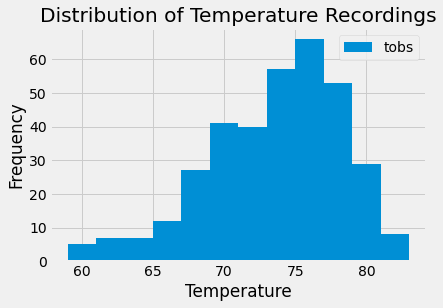

In [260]:
# and plot the results as a histogram
plt.hist(temp_df["tobs"], bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature Recordings')
plt.legend(['tobs'])


# Save the plot
plt.savefig("images/station-histogram.png")
plt.show()

## Bonus Challenge Assignment

In [192]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [219]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start = dt.date(2017, 4, 3)
trip_end = dt.date(2017, 4, 10)
temp_data = calc_temps(trip_start- dt.timedelta(days=365), trip_end- dt.timedelta(days=365))
temp_data

[(65.0, 72.75, 78.0)]

In [224]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
temp_data = temp_data[0]
temp_data


(65.0, 72.75, 78.0)

In [225]:
# Use the average temperature for the y value
avg_temp = temp_data[1]
avg_temp

72.75

In [228]:
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr = temp_data[2]- temp_data[0]
yerr

13.0

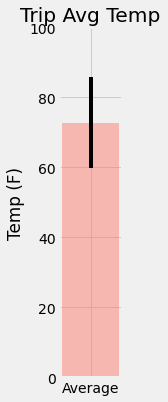

In [261]:
# Plot the results from your previous query as a bar chart. 
plt.figure(figsize=(1, 6))
plt.bar("Average",avg_temp, yerr= yerr, color = 'salmon', alpha =0.5)
plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.ylim(0, 100)

plt.savefig("images/temperature.png")

plt.show()

In [245]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
date_start = trip_start- dt.timedelta(days=365)
date_end = trip_end- dt.timedelta(days=365)


In [252]:
# query to gather data, filtering for matching stations, and between start and end date
x = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
    filter(Station.station == Measurement.station).\
    filter(func.strftime( Measurement.date) >= date_start).\
    filter(func.strftime( Measurement.date) <= date_end).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()

station_temp = pd.DataFrame(x, columns=['station','name','latitude','longitude','elevation','prcp_total'])
station_temp.head(10)

,station,name,latitude,longitude,elevation,prcp_total
0,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2.42
1,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,2.07
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,1.12
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.38
4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.04
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.01
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.00


In [262]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [267]:
# calculate the daily normals for your trip
# 3 day trip from March 4th to March 6th

day_1 = daily_normals("03-04")[0]
day_2 = daily_normals("03-05")[0]
day_3 = daily_normals("03-06")[0]
day_list = [day_1, day_2, day_3]
day_list

[(57.0, 69.27272727272727, 77.0),
 (60.0, 67.89090909090909, 76.0),
 (60.0, 69.20338983050847, 76.0)]

In [269]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_dates = pd.DataFrame(day_list, columns = ['min_temp', 'avg_temp', 'max_temp'])
trip_dates

,min_temp,avg_temp,max_temp
0,57.0,69.272727,77.0
1,60.0,67.890909,76.0
2,60.0,69.203390,76.0


In [271]:
# add the `trip_dates` range as the `date`
dates = [dt.date(2017, 3, 4), dt.date(2017, 3, 5), dt.date(2017, 3, 6)]
trip_dates["Date"] = dates
trip_dates = trip_dates.set_index("Date")
trip_dates

,min_temp,avg_temp,max_temp
Date,,,
2017-03-04,57.0,69.272727,77.0
2017-03-05,60.0,67.890909,76.0
2017-03-06,60.0,69.203390,76.0


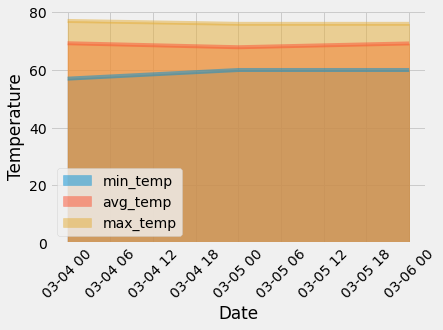

In [289]:
# Plot the daily normals as an area plot with `stacked=False`
trip_dates.plot.area(stacked=False)
plt.ylabel('Temperature')
plt.xticks( rotation=45)

plt.savefig("images/daily_normals.png")
plt.show()
